In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

#Import Data leading r and extra \\ prevent common errors

df = pd.read_csv(r'C:\\Users\\Absinthe\\Documents\\GitHub\\Notebooks\\Walmart_Sales_Data_Analysis\\walmart\\WALMART_SALES_DATA.csv')

In [10]:
#General idea of data size, (rows/columns)
df.shape


(6435, 8)

In [9]:
#Checking the HEADERS of the data set. You can also have Excel open to see this information too
df.head()


Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [12]:
#Shows which values are null
df.isnull()

Store   Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0     False  False         False         False        False       False   
1     False  False         False         False        False       False   
2     False  False         False         False        False       False   
3     False  False         False         False        False       False   
4     False  False         False         False        False       False   
...     ...    ...           ...           ...          ...         ...   
6430  False  False         False         False        False       False   
6431  False  False         False         False        False       False   
6432  False  False         False         False        False       False   
6433  False  False         False         False        False       False   
6434  False  False         False         False        False       False   

        CPI  Unemployment  
0     False         False  
1     False         False  
2     False         False  
3     False         False  
4     False         False  
...     ...           ...  
6430  False         False  
6431  False         False  
6432  False         False  
6433  False         False  
6434  False         False  

[6435 rows x 8 columns]

In [14]:
#Shows which columns have null values, in both example(s), we have clean data
df.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [26]:
#Renaming Columns to be more clear
df.rename(columns = {'Store':'Store_#'}, inplace=True)
df.rename(columns = {'Holiday_Flag':'Holiday_Week'}, inplace=True)
df.rename(columns = {'Temperature':'Temperature_On_That_Day'}, inplace=True)
df.rename(columns = {'Fuel_Price':'Fuel_Price_Of_Region'}, inplace=True)
df.rename(columns = {'CPI':'Consumer_Price_Index'}, inplace=True)
df.rename(columns = {'Unemployment':'Unemployment_Rate_%'}, inplace=True)

df.head()

Store_#        Date  Weekly_Sales  Holiday_Week  Temperature_On_That_Day  \
0        1  05-02-2010    1643690.90             0                    42.31   
1        1  12-02-2010    1641957.44             1                    38.51   
2        1  19-02-2010    1611968.17             0                    39.93   
3        1  26-02-2010    1409727.59             0                    46.63   
4        1  05-03-2010    1554806.68             0                    46.50   

   Fuel_Price_Of_Region  Consumer_Price_Index  Unemployment_Rate_%  
0                 2.572            211.096358                8.106  
1                 2.548            211.242170                8.106  
2                 2.514            211.289143                8.106  
3                 2.561            211.319643                8.106  
4                 2.625            211.350143                8.106

array([[<AxesSubplot:title={'center':'Store_#'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'Holiday_Week'}>],
       [<AxesSubplot:title={'center':'Temperature_On_That_Day'}>,
        <AxesSubplot:title={'center':'Fuel_Price_Of_Region'}>,
        <AxesSubplot:title={'center':'Consumer_Price_Index'}>],
       [<AxesSubplot:title={'center':'Unemployment_Rate_%'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

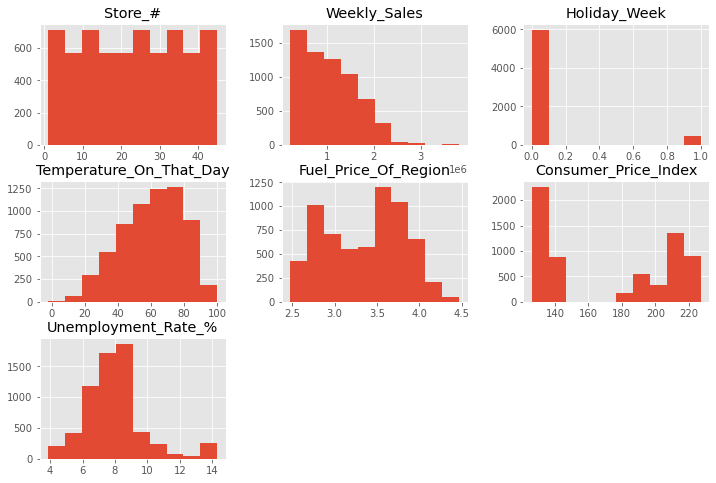

In [27]:
#Plot histograms for all numeric columns 
#Unemployment is mostly 8%
df.hist() 

In [30]:
#Code to see everything and not just the top few and bottom few
pd.set_option('display.max_rows', None)

#Order by weekly sales, Store #14 had the best weekly sale on Christmas Eve (3.8mil) 
#Many stores have similar sales that week though 
#We order by descending by making ascending false

df = df.sort_values(by = ['Weekly_Sales'], inplace=False, ascending=False)
df

Store_#        Date  Weekly_Sales  Holiday_Week  \
1905       14  24-12-2010    3818686.45             0   
2763       20  24-12-2010    3766687.43             0   
1333       10  24-12-2010    3749057.69             0   
527         4  23-12-2011    3676388.98             0   
1762       13  24-12-2010    3595903.20             0   
1814       13  23-12-2011    3556766.03             0   
2815       20  23-12-2011    3555371.03             0   
475         4  24-12-2010    3526713.39             0   
1385       10  23-12-2011    3487986.89             0   
189         2  24-12-2010    3436007.68             0   
1957       14  23-12-2011    3369068.99             0   
241         2  23-12-2011    3224369.80             0   
3764       27  24-12-2010    3078162.08             0   
523         4  25-11-2011    3004702.33             1   
1381       10  25-11-2011    2950198.64             1   
1329       10  26-11-2010    2939946.38             1   
1901       14  26-11-2010    2921709.71             1   
2811       20  25-11-2011    2906233.25             1   
1810       13  25-11-2011    2864170.61             1   
2762       20  17-12-2010    2819193.17             0   
1332       10  17-12-2010    2811646.85             0   
2759       20  26-11-2010    2811634.04             1   
471         4  26-11-2010    2789469.45             1   
1761       13  17-12-2010    2771646.81             0   
526         4  16-12-2011    2771397.17             0   
1758       13  26-11-2010    2766400.05             1   
1904       14  17-12-2010    2762861.41             0   
2814       20  16-12-2011    2762816.65             0   
1813       13  16-12-2011    2760346.71             0   
2761       20  10-12-2010    2752122.08             0   
474         4  17-12-2010    2740057.14             0   
3816       27  23-12-2011    2739019.75             0   
3192       23  24-12-2010    2734277.10             0   
761         6  24-12-2010    2727575.18             0   
1953       14  25-11-2011    2685351.81             1   
2620       19  24-12-2010    2678206.42             0   
185         2  26-11-2010    2658725.29             1   
813         6  23-12-2011    2644633.02             0   
3760       27  26-11-2010    2627910.75             1   
1859       14  05-02-2010    2623469.95             0   
237         2  25-11-2011    2614202.30             1   
188         2  17-12-2010    2609166.75             0   
1903       14  10-12-2010    2600519.26             0   
1956       14  16-12-2011    2594363.09             0   
3244       23  23-12-2011    2587953.32             0   
2830       20  06-04-2012    2565259.92             0   
1384       10  16-12-2011    2555031.18             0   
5532       39  23-12-2011    2554482.84             0   
2813       20  09-12-2011    2546123.78             0   
525         4  09-12-2011    2508955.24             0   
3812       27  25-11-2011    2504400.71             1   
1867       14  02-04-2010    2495630.51             0   
5480       39  24-12-2010    2495489.25             0   
2672       19  23-12-2011    2480159.47             0   
1955       14  09-12-2011    2470581.29             0   
542         4  06-04-2012    2470206.13             0   
2822       20  10-02-2012    2462978.28             1   
1812       13  09-12-2011    2462779.06             0   
1760       13  10-12-2010    2461468.35             0   
240         2  16-12-2011    2432736.52             0   
1383       10  09-12-2011    2429310.90             0   
535         4  17-02-2012    2427640.17             0   
2760       20  03-12-2010    2416051.17             0   
1331       10  10-12-2010    2411790.21             0   
2725       20  02-04-2010    2405395.22             0   
2717       20  05-02-2010    2401395.47             0   
46          1  24-12-2010    2387950.20             0   
3335       24  24-12-2010    2386015.75             0   
187         2  10-12-2010    2378726.55             0   
1972       14  0

In [31]:
#Dropping duplicates if there are any

df.drop_duplicates()

Store_#        Date  Weekly_Sales  Holiday_Week  \
1905       14  24-12-2010    3818686.45             0   
2763       20  24-12-2010    3766687.43             0   
1333       10  24-12-2010    3749057.69             0   
527         4  23-12-2011    3676388.98             0   
1762       13  24-12-2010    3595903.20             0   
1814       13  23-12-2011    3556766.03             0   
2815       20  23-12-2011    3555371.03             0   
475         4  24-12-2010    3526713.39             0   
1385       10  23-12-2011    3487986.89             0   
189         2  24-12-2010    3436007.68             0   
1957       14  23-12-2011    3369068.99             0   
241         2  23-12-2011    3224369.80             0   
3764       27  24-12-2010    3078162.08             0   
523         4  25-11-2011    3004702.33             1   
1381       10  25-11-2011    2950198.64             1   
1329       10  26-11-2010    2939946.38             1   
1901       14  26-11-2010    2921709.71             1   
2811       20  25-11-2011    2906233.25             1   
1810       13  25-11-2011    2864170.61             1   
2762       20  17-12-2010    2819193.17             0   
1332       10  17-12-2010    2811646.85             0   
2759       20  26-11-2010    2811634.04             1   
471         4  26-11-2010    2789469.45             1   
1761       13  17-12-2010    2771646.81             0   
526         4  16-12-2011    2771397.17             0   
1758       13  26-11-2010    2766400.05             1   
1904       14  17-12-2010    2762861.41             0   
2814       20  16-12-2011    2762816.65             0   
1813       13  16-12-2011    2760346.71             0   
2761       20  10-12-2010    2752122.08             0   
474         4  17-12-2010    2740057.14             0   
3816       27  23-12-2011    2739019.75             0   
3192       23  24-12-2010    2734277.10             0   
761         6  24-12-2010    2727575.18             0   
1953       14  25-11-2011    2685351.81             1   
2620       19  24-12-2010    2678206.42             0   
185         2  26-11-2010    2658725.29             1   
813         6  23-12-2011    2644633.02             0   
3760       27  26-11-2010    2627910.75             1   
1859       14  05-02-2010    2623469.95             0   
237         2  25-11-2011    2614202.30             1   
188         2  17-12-2010    2609166.75             0   
1903       14  10-12-2010    2600519.26             0   
1956       14  16-12-2011    2594363.09             0   
3244       23  23-12-2011    2587953.32             0   
2830       20  06-04-2012    2565259.92             0   
1384       10  16-12-2011    2555031.18             0   
5532       39  23-12-2011    2554482.84             0   
2813       20  09-12-2011    2546123.78             0   
525         4  09-12-2011    2508955.24             0   
3812       27  25-11-2011    2504400.71             1   
1867       14  02-04-2010    2495630.51             0   
5480       39  24-12-2010    2495489.25             0   
2672       19  23-12-2011    2480159.47             0   
1955       14  09-12-2011    2470581.29             0   
542         4  06-04-2012    2470206.13             0   
2822       20  10-02-2012    2462978.28             1   
1812       13  09-12-2011    2462779.06             0   
1760       13  10-12-2010    2461468.35             0   
240         2  16-12-2011    2432736.52             0   
1383       10  09-12-2011    2429310.90             0   
535         4  17-02-2012    2427640.17             0   
2760       20  03-12-2010    2416051.17             0   
1331       10  10-12-2010    2411790.21             0   
2725       20  02-04-2010    2405395.22             0   
2717       20  05-02-2010    2401395.47             0   
46          1  24-12-2010    2387950.20             0   
3335       24  24-12-2010    2386015.75             0   
187         2  10-12-2010    2378726.55             0   
1972       14  0

In [32]:
#Checking Correlation

df.corr(method='pearson')

Store_#  Weekly_Sales  Holiday_Week  \
Store_#                  1.000000e+00     -0.335332 -7.042615e-18   
Weekly_Sales            -3.353320e-01      1.000000  3.689097e-02   
Holiday_Week            -7.042615e-18      0.036891  1.000000e+00   
Temperature_On_That_Day -2.265908e-02     -0.063810 -1.550913e-01   
Fuel_Price_Of_Region     6.002295e-02      0.009464 -7.834652e-02   
Consumer_Price_Index    -2.094919e-01     -0.072634 -2.162091e-03   
Unemployment_Rate_%      2.235313e-01     -0.106176  1.096028e-02   

                         Temperature_On_That_Day  Fuel_Price_Of_Region  \
Store_#                                -0.022659              0.060023   
Weekly_Sales                           -0.063810              0.009464   
Holiday_Week                           -0.155091             -0.078347   
Temperature_On_That_Day                 1.000000              0.144982   
Fuel_Price_Of_Region                    0.144982              1.000000   
Consumer_Price_Index                    0.176888             -0.170642   
Unemployment_Rate_%                     0.101158             -0.034684   

                         Consumer_Price_Index  Unemployment_Rate_%  
Store_#                             -0.209492             0.223531  
Weekly_Sales                        -0.072634            -0.106176  
Holiday_Week                        -0.002162             0.010960  
Temperature_On_That_Day              0.176888             0.101158  
Fuel_Price_Of_Region                -0.170642            -0.034684  
Consumer_Price_Index                 1.000000            -0.302020  
Unemployment_Rate_%                 -0.302020             1.000000

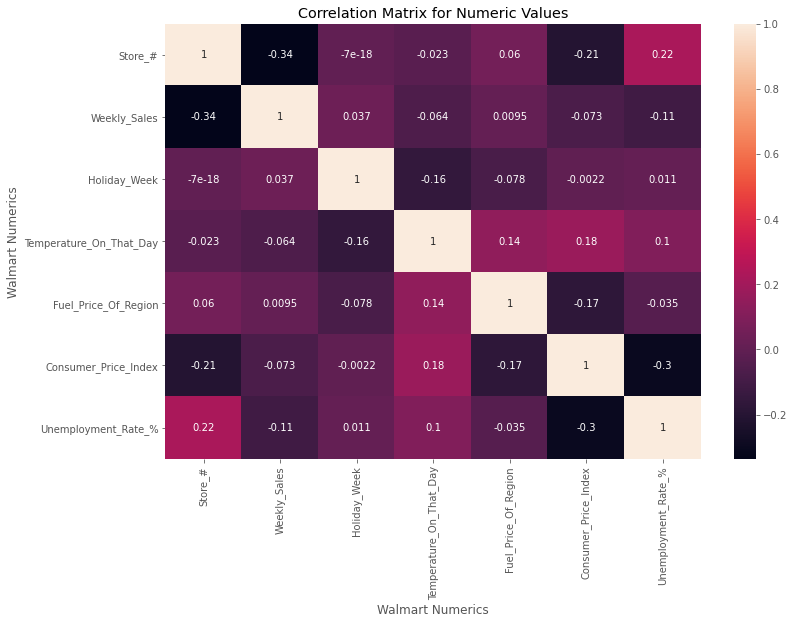

In [33]:
#Heatmap to visualize correlation better
#Nothing appears to be heavily correlated with another column (-1 to 1)
#Insight can come from what the data isn't telling you, eg: umemployment is not correlated with other columns to a meaningful extent (>0.8)
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)


plt.title('Correlation Matrix for Numeric Values')

plt.xlabel('Walmart Numerics')
plt.ylabel('Walmart Numerics')
plt.show()

<AxesSubplot:title={'center':'Total sales for each store'}, xlabel='Store_#', ylabel='Total Sales'>

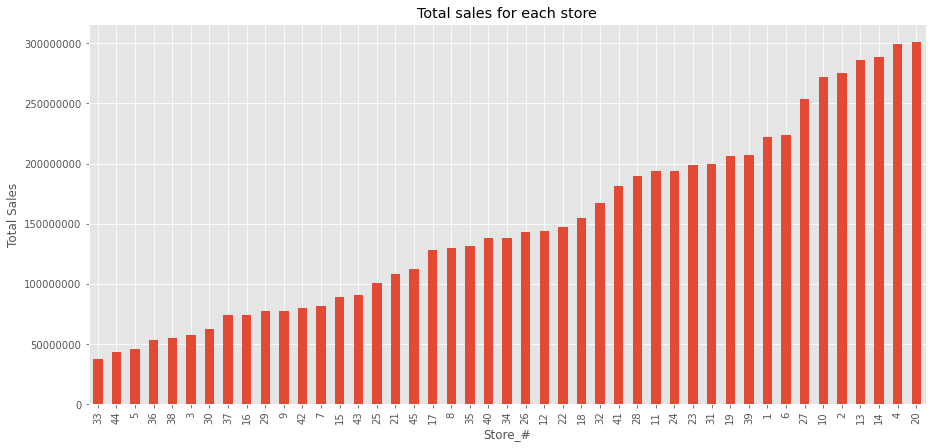

In [36]:
#Taking the sum of all weekly sales we can get Total Sales
#Store #20 had the highest sales from its inception (5/2/2010)
#Store #33 had to the smallest total sales from its inception (17-08-2012)


total_sales= df.groupby('Store_#')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)

plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

In [52]:
#Defining holiday dates

Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

#Calculating mean sales on holidays : 


Thanksgiving_Sales = (pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(df.loc[df.Date.isin(Christmas)]))['Weekly_Sales'].mean()

Thanksgiving_Sales, Christmas_Sales

(1471273.427777778, 960833.1115555551)

In [53]:
#Calculating mean sales on non-holidays :
Non_Holiday_Sales = df[df['Holiday_Week'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales

1041256.3802088547

Random Forest Regressor:

Accuracy: 93.6414187277949
Mean Absolute Error: 79152.21102066823
Mean Squared Error: 21184500121.064213
Root Mean Squared Error: 145548.9612503786


C:\Users\Absinthe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


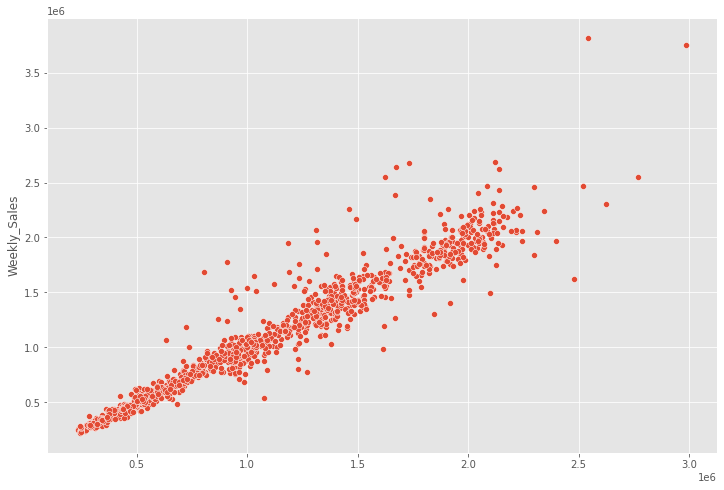

In [59]:
# Linear Regression :
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = df[['Store_#','Fuel_Price_Of_Region','Consumer_Price_Index','Unemployment_Rate_%']]
Y = df['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)


import warnings
warnings.filterwarnings('ignore')

